In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar o arquivo CSV
df = pd.read_csv('novos_dados_sinteticos_ctgan.csv')

# Separar as variáveis preditoras (X) e a variável alvo (y)
X = df.drop(columns=['recommended (1 partial; 2 complete)'])
y = df['recommended (1 partial; 2 complete)']

# Dividir em conjuntos de treinamento e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Modelos sem normalização
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Treinar e avaliar os modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.98
K-Nearest Neighbors Accuracy: 0.94
Random Forest Accuracy: 0.98


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Definir o scaler
scaler = StandardScaler()

# Modelos com normalização
models_normalized = {
    'Logistic Regression': Pipeline([('scaler', scaler), ('classifier', LogisticRegression())]),
    'K-Nearest Neighbors': Pipeline([('scaler', scaler), ('classifier', KNeighborsClassifier())]),
    'Random Forest': Pipeline([('scaler', scaler), ('classifier', RandomForestClassifier())])
}

# Treinar e avaliar os modelos com normalização
for name, model in models_normalized.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{name} (Normalized) Accuracy: {accuracy:.2f}')


Logistic Regression (Normalized) Accuracy: 0.98
K-Nearest Neighbors (Normalized) Accuracy: 0.98
Random Forest (Normalized) Accuracy: 0.98


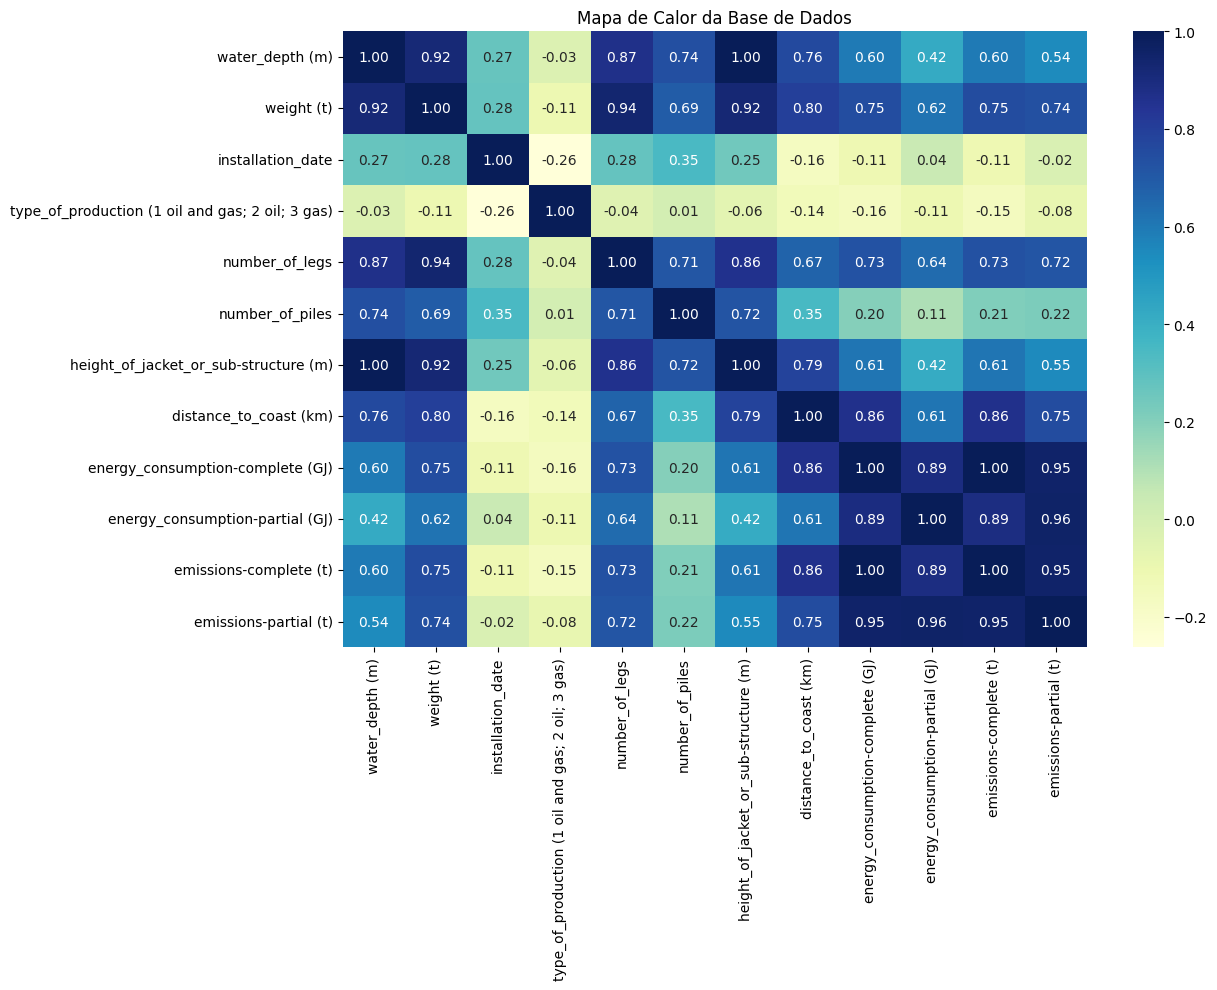

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df2 = pd.read_csv('imputed_plataformas_otc.csv')
df2 = df2.drop(columns=['recommended (1 partial; 2 complete)'])

# Gerar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de Calor da Base de Dados")
plt.show()


In [49]:
df3 = pd.read_csv('dados/nova_plataforma.csv')

# Lista de colunas do dataframe novo
colunas_novo = [
    'water_depth (m)', 'weight (t)', 'installation_date', 'type_of_production (1 oil and gas; 2 oil; 3 gas)', 
    'number_of_legs', 'number_of_piles', 'height_of_jacket_or_sub-structure (m)', 
    'distance_to_coast (km)', 'energy_consumption-complete (GJ)', 
    'energy_consumption-partial (GJ)', 'emissions-complete (t)', 
    'emissions-partial (t)', 'recommended'
]

# Dropar as colunas que estão no antigo mas não no novo
df_antigo = df3.copy()  # Supondo que 'df' seja o dataframe antigo
colunas_para_dropar = [col for col in df_antigo.columns if col not in colunas_novo]

# Dropar as colunas
df_antigo.drop(columns=colunas_para_dropar, inplace=True)

# Exibir as primeiras linhas do dataframe atualizado
print(df_antigo.head())


   water_depth (m)  weight (t)  installation_date  \
0               99       22000                 36   
1              112       20364                 41   
2              141       15561                 46   
3              156       27647                 44   
4              103       18584                 33   

   type_of_production (1 oil and gas; 2 oil; 3 gas)  number_of_legs  \
0                                                 1               8   
1                                                 1               8   
2                                                 2               8   
3                                                 2               8   
4                                                 1               8   

   number_of_piles  height_of_jacket_or_sub-structure (m)  \
0                8                                  114.0   
1                9                                  123.0   
2               26                                  147.0   
3         

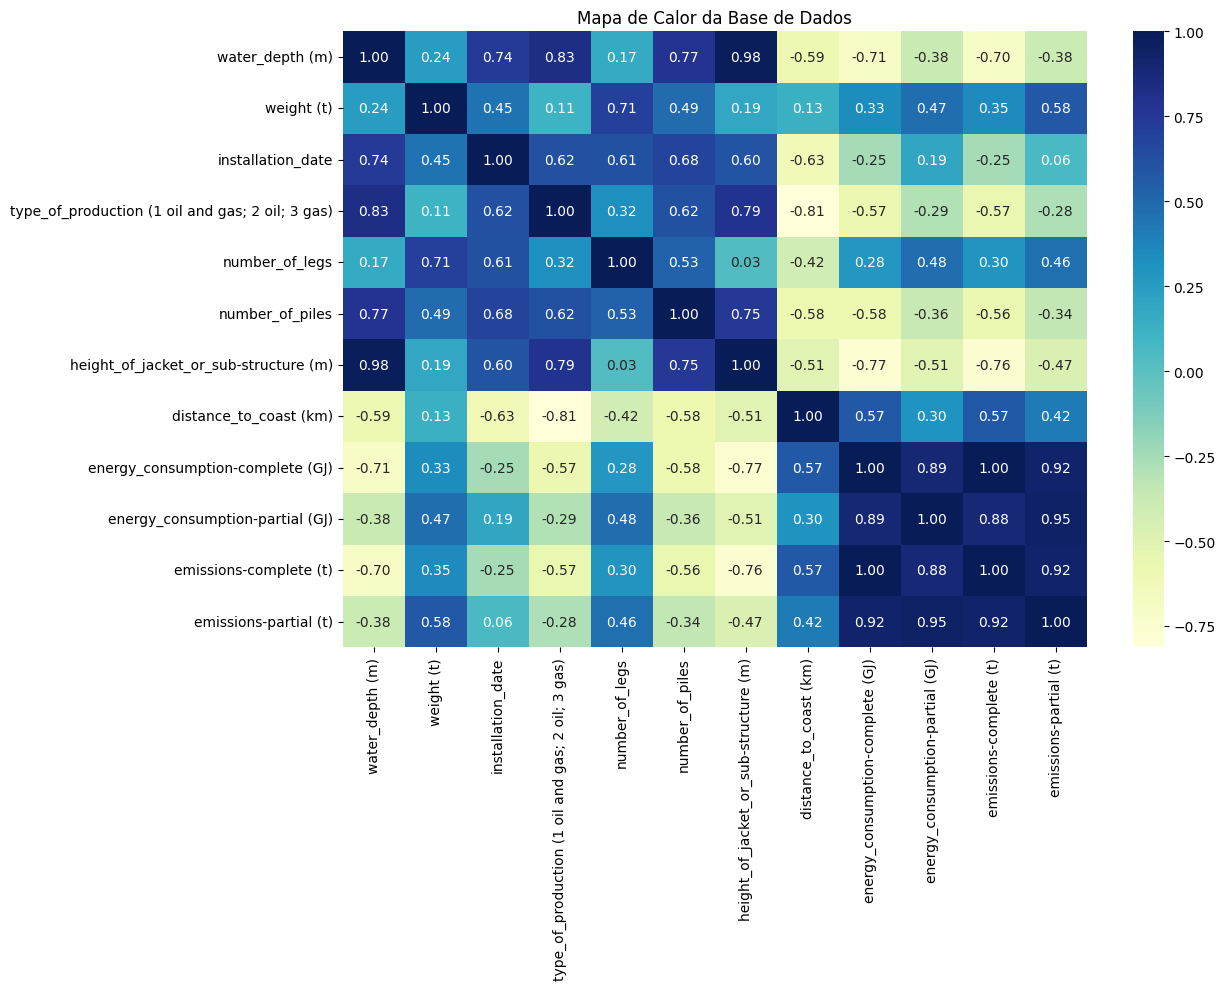

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_antigo.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de Calor da Base de Dados")
plt.show()
